In [75]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [58]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

In [59]:
m_train = x_train.shape[0]
m_test = x_test.shape[0]
x_train_dim = x_train.shape
y_train_dim = y_train.shape
x_test_dim = x_test.shape
y_test_dim = y_test.shape
print("The number of training examples: " + str(m_train))
print("The number of test examples: " + str(m_test))
print("x_train shape: " + str(x_train_dim))
print("y_train shape: " + str(y_train_dim))
print("x_test shape:" + str(x_test_dim))
print("y_test shape:" + str(y_test_dim))

The number of training examples: 60000
The number of test examples: 10000
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape:(10000, 28, 28)
y_test shape:(10000,)


In [97]:
# Adding the number of channels as dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

The object is: Dress


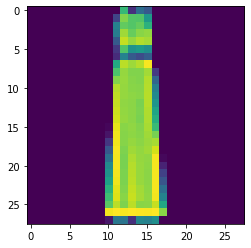

In [98]:
classes = {0:'T-Shirt/Top', 1:'Trouser', 2:'pullover', 3:'Dress', 4:'Coat', 5:'Sandal',6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}
plt.figure()
index = 57888
plt.imshow(x_train[index,:,:,0])
print("The object is: " + str(classes[y_train[index]]))

In [61]:
# Normalizing the input dataset
x_train = x_train/255.0
x_test = x_test/255.0
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [62]:
# Converting the y-labels to one-hot vector
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [63]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [64]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
evaluate = model.fit(x_train, Y_train, batch_size=512, epochs=16, verbose=1)

Epoch 1/16
60000/60000 [==============================] - 44s 735us/step - loss: 0.6639 - accuracy: 0.7540
Epoch 2/16
60000/60000 [==============================] - 44s 727us/step - loss: 0.3989 - accuracy: 0.8530
Epoch 3/16
60000/60000 [==============================] - 44s 726us/step - loss: 0.3405 - accuracy: 0.8743
Epoch 4/16
60000/60000 [==============================] - 44s 725us/step - loss: 0.3077 - accuracy: 0.8848
Epoch 5/16
60000/60000 [==============================] - 44s 727us/step - loss: 0.2840 - accuracy: 0.8953
Epoch 6/16
60000/60000 [==============================] - 44s 733us/step - loss: 0.2599 - accuracy: 0.9030
Epoch 7/16
60000/60000 [==============================] - 44s 731us/step - loss: 0.2500 - accuracy: 0.9065
Epoch 8/16
60000/60000 [==============================] - 44s 733us/step - loss: 0.2342 - accuracy: 0.9118
Epoch 9/16
60000/60000 [==============================] - 43s 720us/step - loss: 0.2196 - accuracy: 0.9176
Epoch 10/16
60000/60000 [============

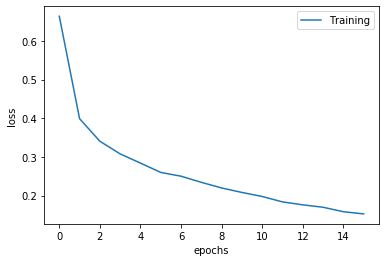

In [72]:
plt.plot(evaluate.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training'], loc='upper right')
plt.show()

In [100]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)             

In [73]:
# Evaluating the performance on testset
(loss, accuracy) = model.evaluate(x_test,Y_test, verbose=0)
print('The loss on test set is ' + str(loss))
print('The accuracy on test set is ' + str(accuracy))

The loss on test set is 0.24334609733223916
The accuracy on test set is 0.9168999791145325


In [83]:
# Predicting the trained model on the testset
index_pred = model.predict(np.array(x_test))

The below object is - Bag
The prediction for below object is -  Bag


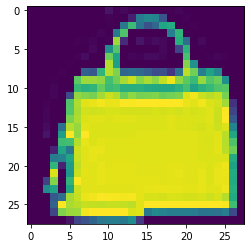

In [99]:
test_index = 8904
plt.imshow(x_test[test_index,:,:,0])
print('The below object is - ' + str(classes[y_test[test_index]]))
print('The prediction for below object is -  ' + str(classes[np.argmax(index_pred[test_index])]))